In [1]:
#Import the required Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [2]:
#set options to display all the rows and columns in the output

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#read the application data and display top 5 rows
leads_data=pd.read_csv("Leads.csv",sep=",",encoding='utf-8')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#number of rows and columns in the data

leads_data.shape

(9240, 37)

In [5]:
#displaying the detailed information like column names and non-null counts

#leads_data.info(verbose=True,show_counts=True)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#function to find the percentages of null values for each column in dataframe

def null_values_percentage(dataframe):
    return round(dataframe.isnull().sum()/len(dataframe.index)*100,3)

In [7]:
#null values percentage in leads data

missing_data=null_values_percentage(leads_data)
print(missing_data)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [8]:
# Converting 'Select' values to null values.
leads_data = leads_data.replace('Select',np.nan)

In [9]:
leads_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [10]:
# Replacing null values with mode for Lead Quality
leads_data['Lead Quality'] = leads_data['Lead Quality'].replace(np.nan, leads_data['Lead Quality'].mode()[0])

In [11]:
print(null_values_percentage(leads_data))

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
How did you hear about X Education               78.463
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [12]:
#drop irrelevant columns

irrelavant_columns = ['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
leads_data.drop(columns=irrelavant_columns, axis=1, inplace=True)

In [13]:
#convert the values in the column and replace null values
leads_data['Asymmetrique Activity Index'] = leads_data['Asymmetrique Activity Index'].apply(lambda x:3 if pd.isnull(x) else x).apply(lambda x: 1 if x == '01.High' else (2 if x == '02.Medium' else 3))

In [14]:
# Value counts for 'Asymmetrique Activity Index'
leads_data['Asymmetrique Activity Index'].value_counts()

3    4580
2    3839
1     821
Name: Asymmetrique Activity Index, dtype: int64

In [15]:
# Null values in 'leads_data'
print(null_values_percentage(leads_data))

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
How did you hear about X Education               78.463
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [16]:
#converting all the null values to their mode having more than 15% null values

null_data=null_values_percentage(leads_data)
columns_to_fill = null_data[null_data >= 15].index
for column in columns_to_fill:
    mode_value = leads_data[column].mode()[0]  
    leads_data[column].fillna(mode_value, inplace=True)

In [17]:
# Null values in 'leads data'
print(null_values_percentage(leads_data))

Prospect ID                                      0.000
Lead Number                                      0.000
Lead Origin                                      0.000
Lead Source                                      0.390
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      1.483
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.483
Last Activity                                    1.115
Country                                          0.000
Specialization                                   0.000
How did you hear about X Education               0.000
What is your current occupation                  0.000
What matters most to you in choosing a course    0.000
Search                                           0.000
Magazine                                         0.000
Newspaper 

In [18]:
#dropping the data having null values under 2%

leads_data=leads_data.dropna()

In [19]:
# Null values in 'leads data'
print(null_values_percentage(leads_data))

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [20]:
leads_data.shape

(9074, 34)

In [21]:
#displaying the detailed information like column names and non-null counts
leads_data.info()
#leads_data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [22]:
#imbalance percentage

imbalance_ratio = leads_data['Converted'].value_counts(normalize=True) * 100
print(imbalance_ratio)

0    62.144589
1    37.855411
Name: Converted, dtype: float64


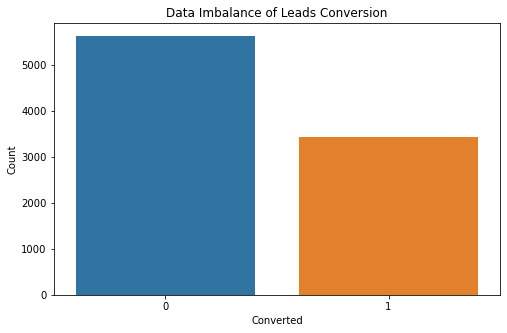

In [23]:
#countplot for displaying data imbalance

plt.figure(figsize=(8, 5))
sns.countplot(x='Converted',data=leads_data)
plt.title('Data Imbalance of Leads Conversion')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

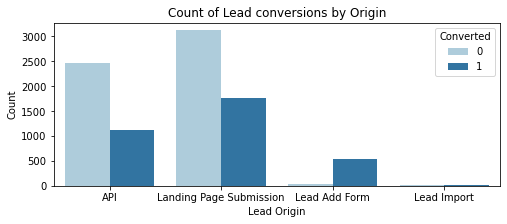

In [24]:

plt.figure(figsize=(8, 3))
sns.countplot(x='Lead Origin',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Origin')
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.show()

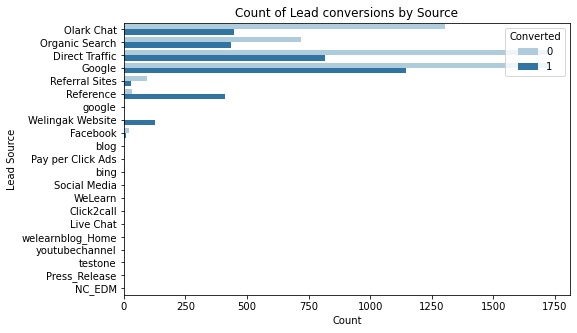

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Lead Source',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Source')
plt.xlabel('Count')
plt.ylabel('Lead Source')
plt.show()

In [26]:
# Replacing 'google' with 'Google'
leads_data.loc[leads_data['Lead Source'] == 'google', 'Lead Source'] = 'Google'
# Creating a new Category for all the categories with less value
categories_to_replace = ['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                         'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel']
leads_data.loc[leads_data['Lead Source'].isin(categories_to_replace), 'Lead Source'] = 'Others'


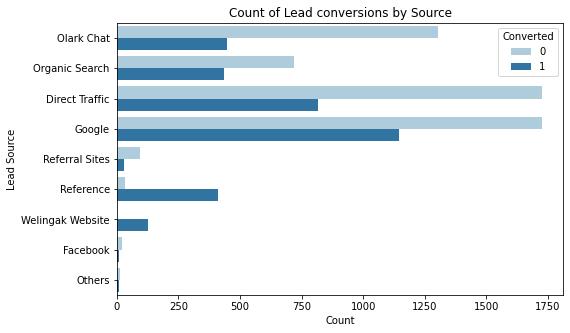

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Lead Source',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Source')
plt.xlabel('Count')
plt.ylabel('Lead Source')
plt.show()

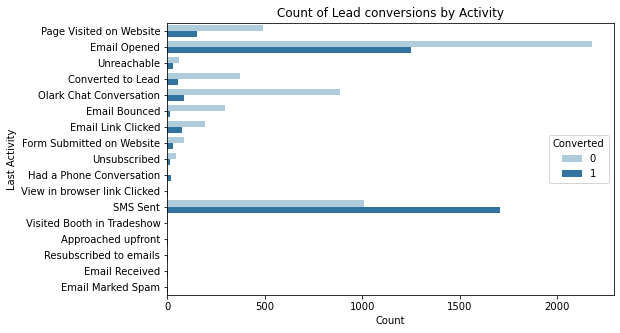

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Last Activity',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Activity')
plt.xlabel('Count')
plt.ylabel('Last Activity')
plt.show()

In [29]:
# Converting last activities to "Other_Activity" which are having less data.
activities_to_replace = ['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam']
leads_data.loc[leads_data['Last Activity'].isin(activities_to_replace), 'Last Activity'] = 'Other_Activity'

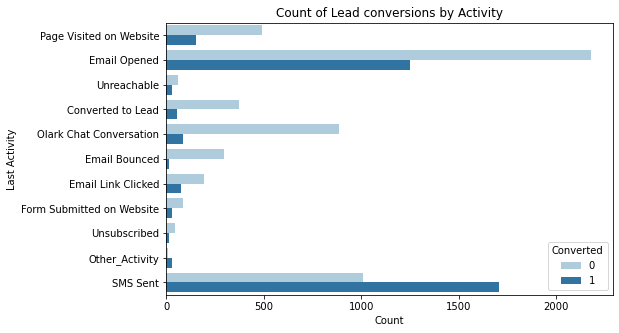

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Last Activity',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Activity')
plt.xlabel('Count')
plt.ylabel('Last Activity')
plt.show()

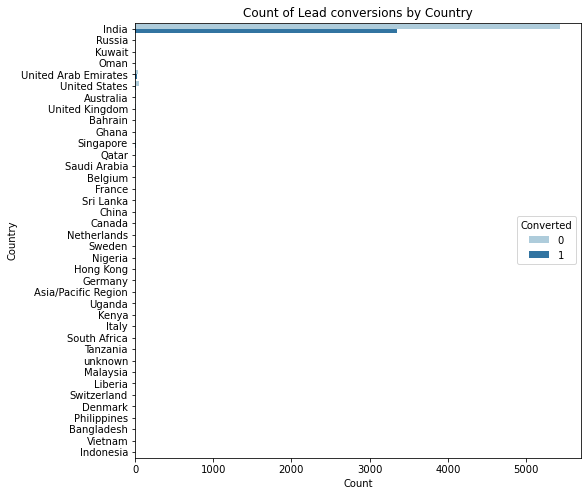

In [31]:
plt.figure(figsize=(8, 8))
sns.countplot(y='Country',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

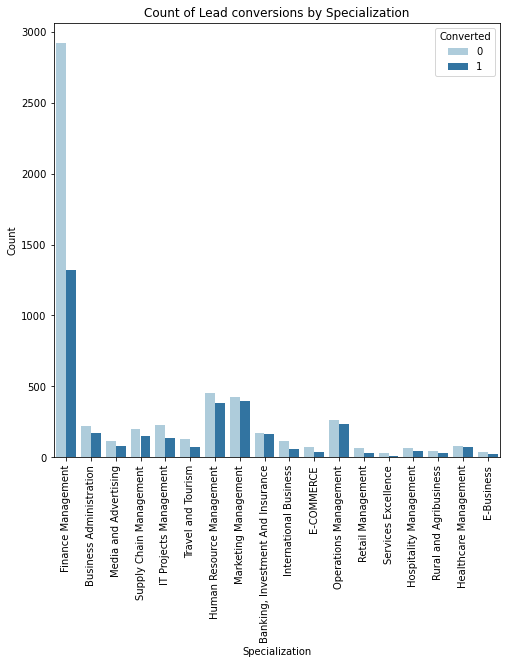

In [32]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Specialization',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

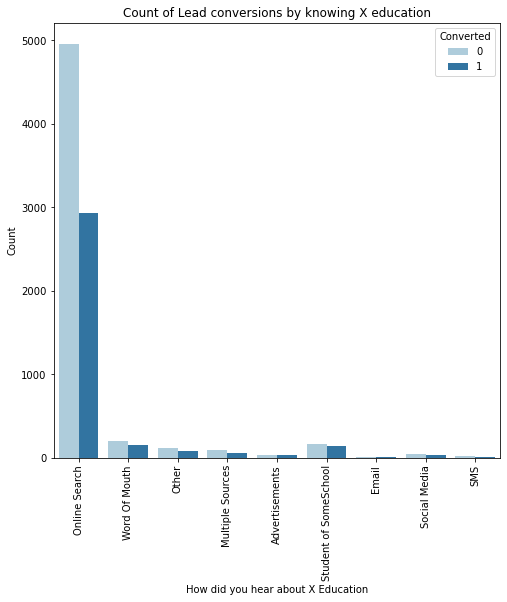

In [33]:

plt.figure(figsize=(8, 8))
sns.countplot(x='How did you hear about X Education',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by knowing X education')
plt.xlabel('How did you hear about X Education')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

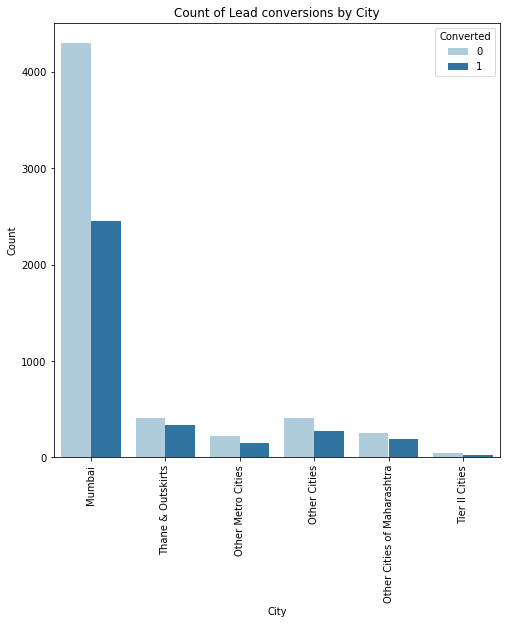

In [34]:

plt.figure(figsize=(8, 8))
sns.countplot(x='City',data=leads_data,hue="Converted", palette='Paired')
plt.title('Count of Lead conversions by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

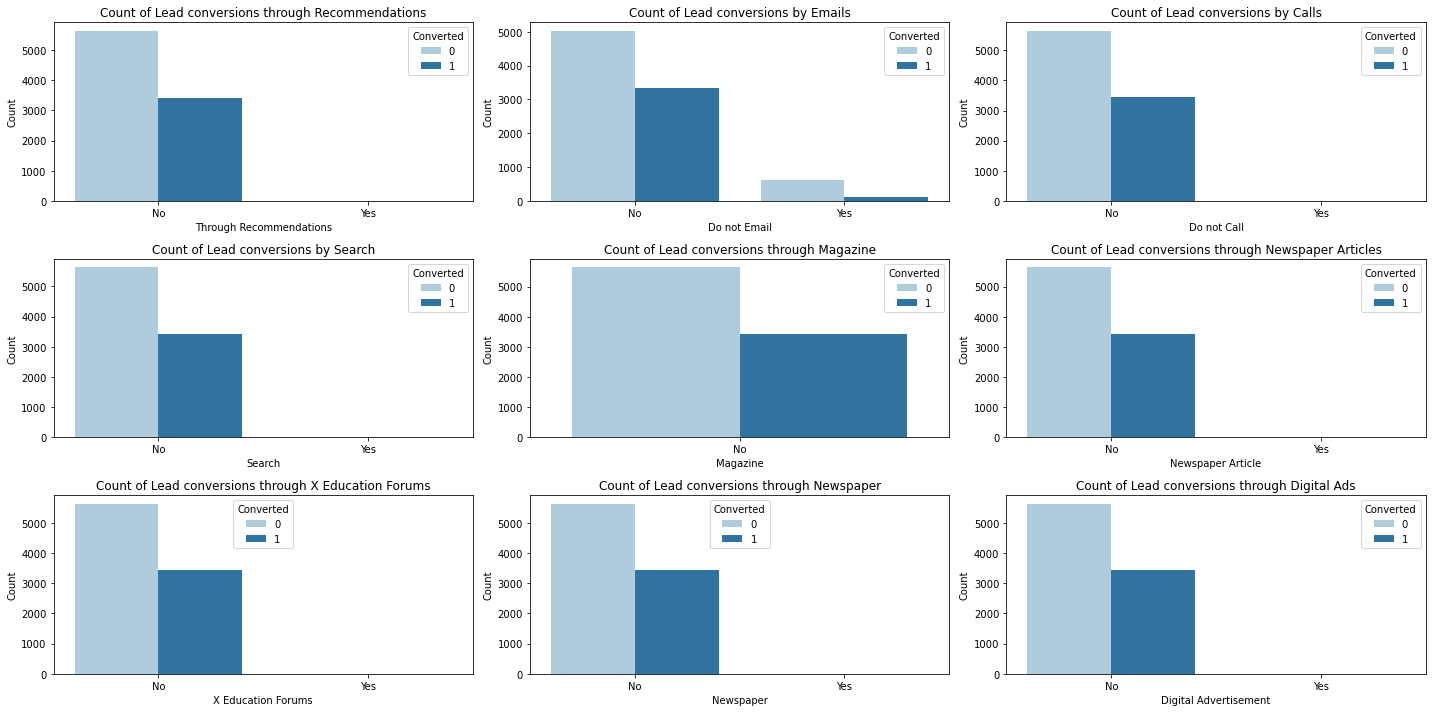

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
sns.countplot(x='Through Recommendations',data=leads_data,hue="Converted", palette='Paired',ax=axes[0,0])
axes[0,0].set_title('Count of Lead conversions through Recommendations')
axes[0,0].set_xlabel('Through Recommendations')
axes[0,0].set_ylabel('Count')

sns.countplot(x='Do Not Email',data=leads_data,hue="Converted", palette='Paired',ax=axes[0,1])
axes[0,1].set_title('Count of Lead conversions by Emails')
axes[0,1].set_xlabel('Do not Email')
axes[0,1].set_ylabel('Count')

sns.countplot(x='Do Not Call',data=leads_data,hue="Converted", palette='Paired',ax=axes[0,2])
axes[0,2].set_title('Count of Lead conversions by Calls')
axes[0,2].set_xlabel('Do not Call')
axes[0,2].set_ylabel('Count')

sns.countplot(x='Search',data=leads_data,hue="Converted", palette='Paired',ax=axes[1,0])
axes[1,0].set_title('Count of Lead conversions by Search')
axes[1,0].set_xlabel('Search')
axes[1,0].set_ylabel('Count')

sns.countplot(x='Magazine',data=leads_data,hue="Converted", palette='Paired',ax=axes[1,1])
axes[1,1].set_title('Count of Lead conversions through Magazine')
axes[1,1].set_xlabel('Magazine')
axes[1,1].set_ylabel('Count')

sns.countplot(x='Newspaper Article',data=leads_data,hue="Converted", palette='Paired',ax=axes[1,2])
axes[1,2].set_title('Count of Lead conversions through Newspaper Articles')
axes[1,2].set_xlabel('Newspaper Article')
axes[1,2].set_ylabel('Count')

sns.countplot(x='X Education Forums',data=leads_data,hue="Converted", palette='Paired',ax=axes[2,0])
axes[2,0].set_title('Count of Lead conversions through X Education Forums')
axes[2,0].set_xlabel('X Education Forums')
axes[2,0].set_ylabel('Count')

sns.countplot(x='Newspaper',data=leads_data,hue="Converted", palette='Paired',ax=axes[2,1])
axes[2,1].set_title('Count of Lead conversions through Newspaper')
axes[2,1].set_xlabel('Newspaper')
axes[2,1].set_ylabel('Count')

sns.countplot(x='Digital Advertisement',data=leads_data,hue="Converted", palette='Paired', ax=axes[2,2])
axes[2,2].set_title('Count of Lead conversions through Digital Ads')
axes[2,2].set_xlabel('Digital Advertisement')
axes[2,2].set_ylabel('Count')

plt.tight_layout()  # Adjust layout
plt.show()

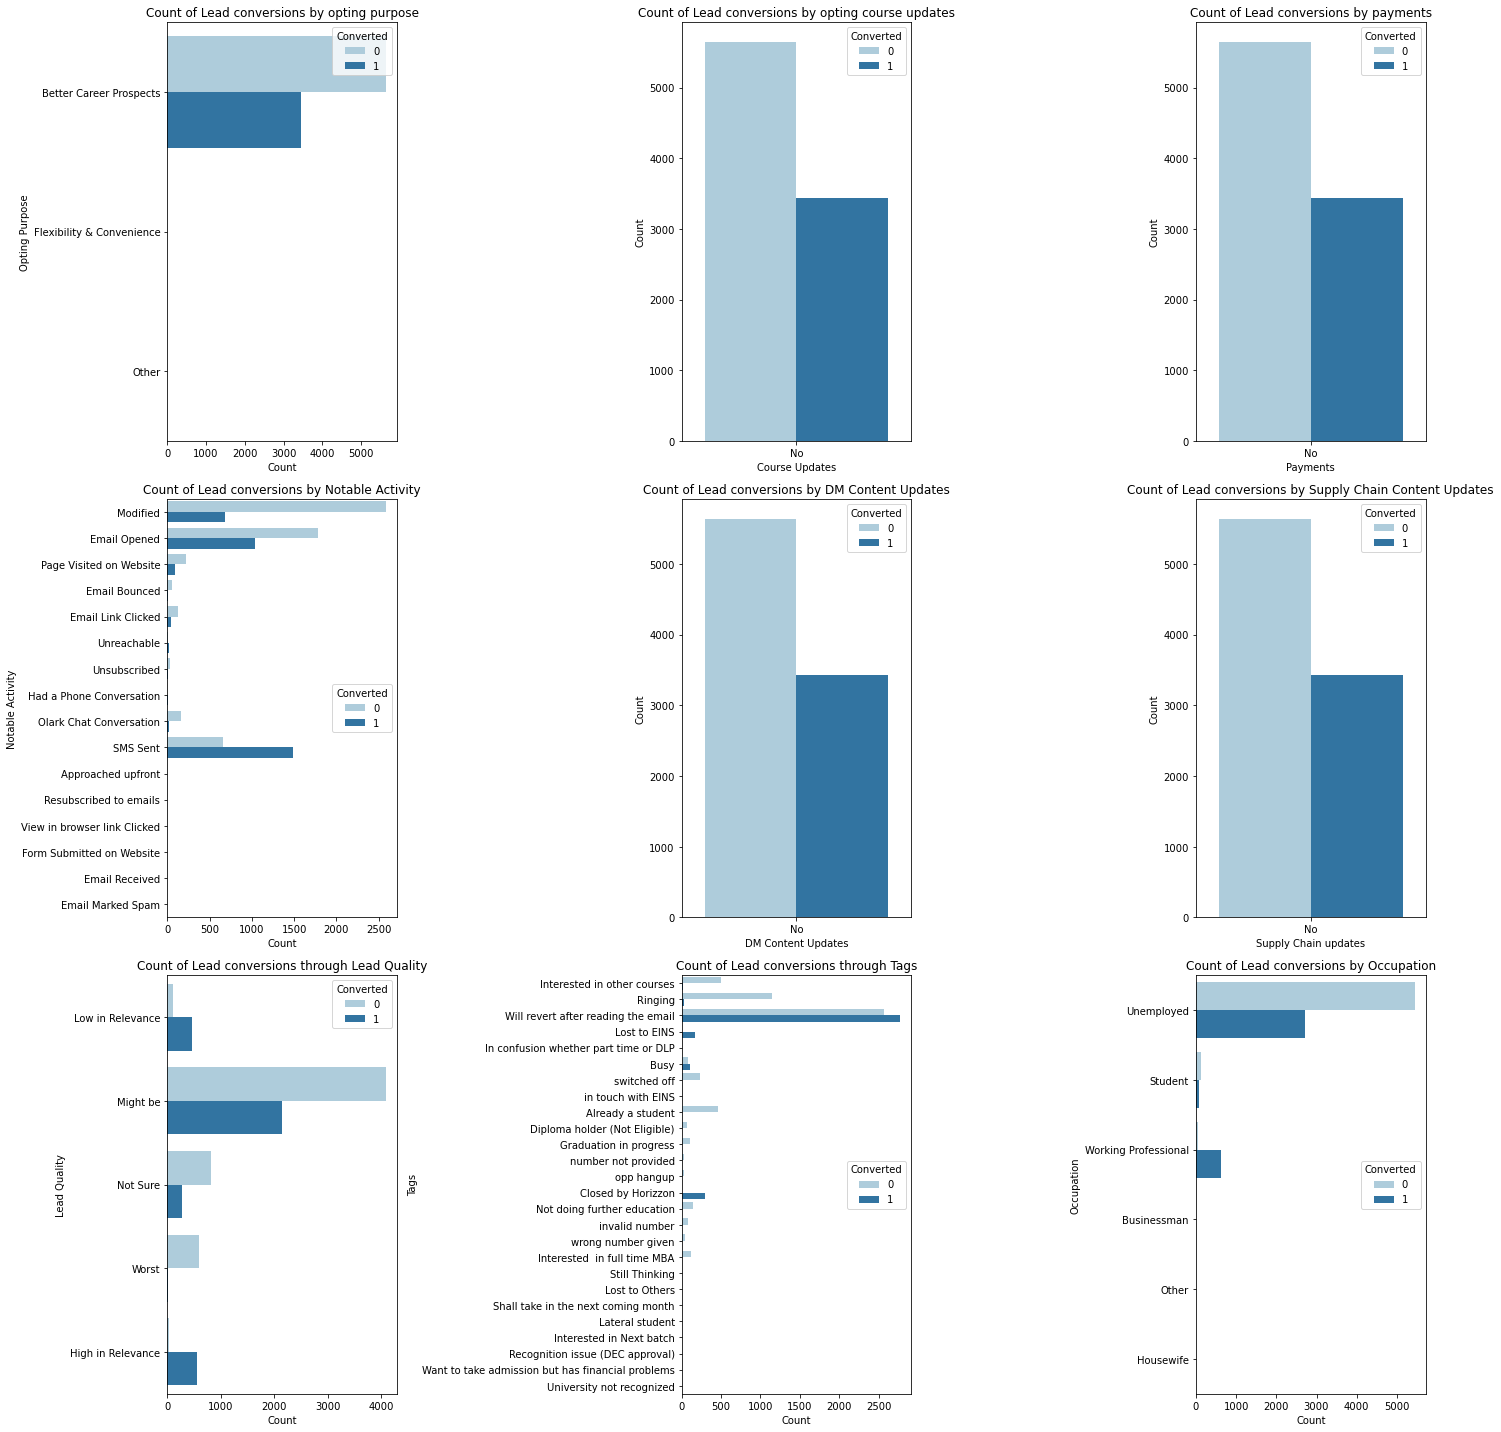

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
sns.countplot(y='What matters most to you in choosing a course',data=leads_data,hue="Converted", palette='Paired',ax=axes[0,0])
axes[0,0].set_title('Count of Lead conversions by opting purpose')
axes[0,0].set_xlabel('Count')
axes[0,0].set_ylabel('Opting Purpose')

sns.countplot(x='Receive More Updates About Our Courses',data=leads_data,hue="Converted", palette='Paired',ax=axes[0,1])
axes[0,1].set_title('Count of Lead conversions by opting course updates')
axes[0,1].set_xlabel('Course Updates')
axes[0,1].set_ylabel('Count')

sns.countplot(x='I agree to pay the amount through cheque',data=leads_data,hue="Converted", palette='Paired',ax=axes[0,2])
axes[0,2].set_title('Count of Lead conversions by payments')
axes[0,2].set_xlabel('Payments')
axes[0,2].set_ylabel('Count')

sns.countplot(y='Last Notable Activity',data=leads_data,hue="Converted", palette='Paired',ax=axes[1,0])
axes[1,0].set_title('Count of Lead conversions by Notable Activity')
axes[1,0].set_xlabel('Count')
axes[1,0].set_ylabel('Notable Activity')

sns.countplot(x='Get updates on DM Content',data=leads_data,hue="Converted", palette='Paired',ax=axes[1,1])
axes[1,1].set_title('Count of Lead conversions by DM Content Updates')
axes[1,1].set_xlabel('DM Content Updates')
axes[1,1].set_ylabel('Count')

sns.countplot(x='Update me on Supply Chain Content',data=leads_data,hue="Converted", palette='Paired',ax=axes[1,2])
axes[1,2].set_title('Count of Lead conversions by Supply Chain Content Updates')
axes[1,2].set_xlabel('Supply Chain updates')
axes[1,2].set_ylabel('Count')

sns.countplot(y='Lead Quality',data=leads_data,hue="Converted", palette='Paired',ax=axes[2,0])
axes[2,0].set_title('Count of Lead conversions through Lead Quality')
axes[2,0].set_xlabel('Count')
axes[2,0].set_ylabel('Lead Quality')

sns.countplot(y='Tags',data=leads_data,hue="Converted", palette='Paired',ax=axes[2,1])
axes[2,1].set_title('Count of Lead conversions through Tags')
axes[2,1].set_xlabel('Count')
axes[2,1].set_ylabel('Tags')

sns.countplot(y='What is your current occupation',data=leads_data,hue="Converted", palette='Paired', ax=axes[2,2])
axes[2,2].set_title('Count of Lead conversions by Occupation')
axes[2,2].set_xlabel('Count')
axes[2,2].set_ylabel('Occupation')

plt.tight_layout()  # Adjust layout
plt.show()

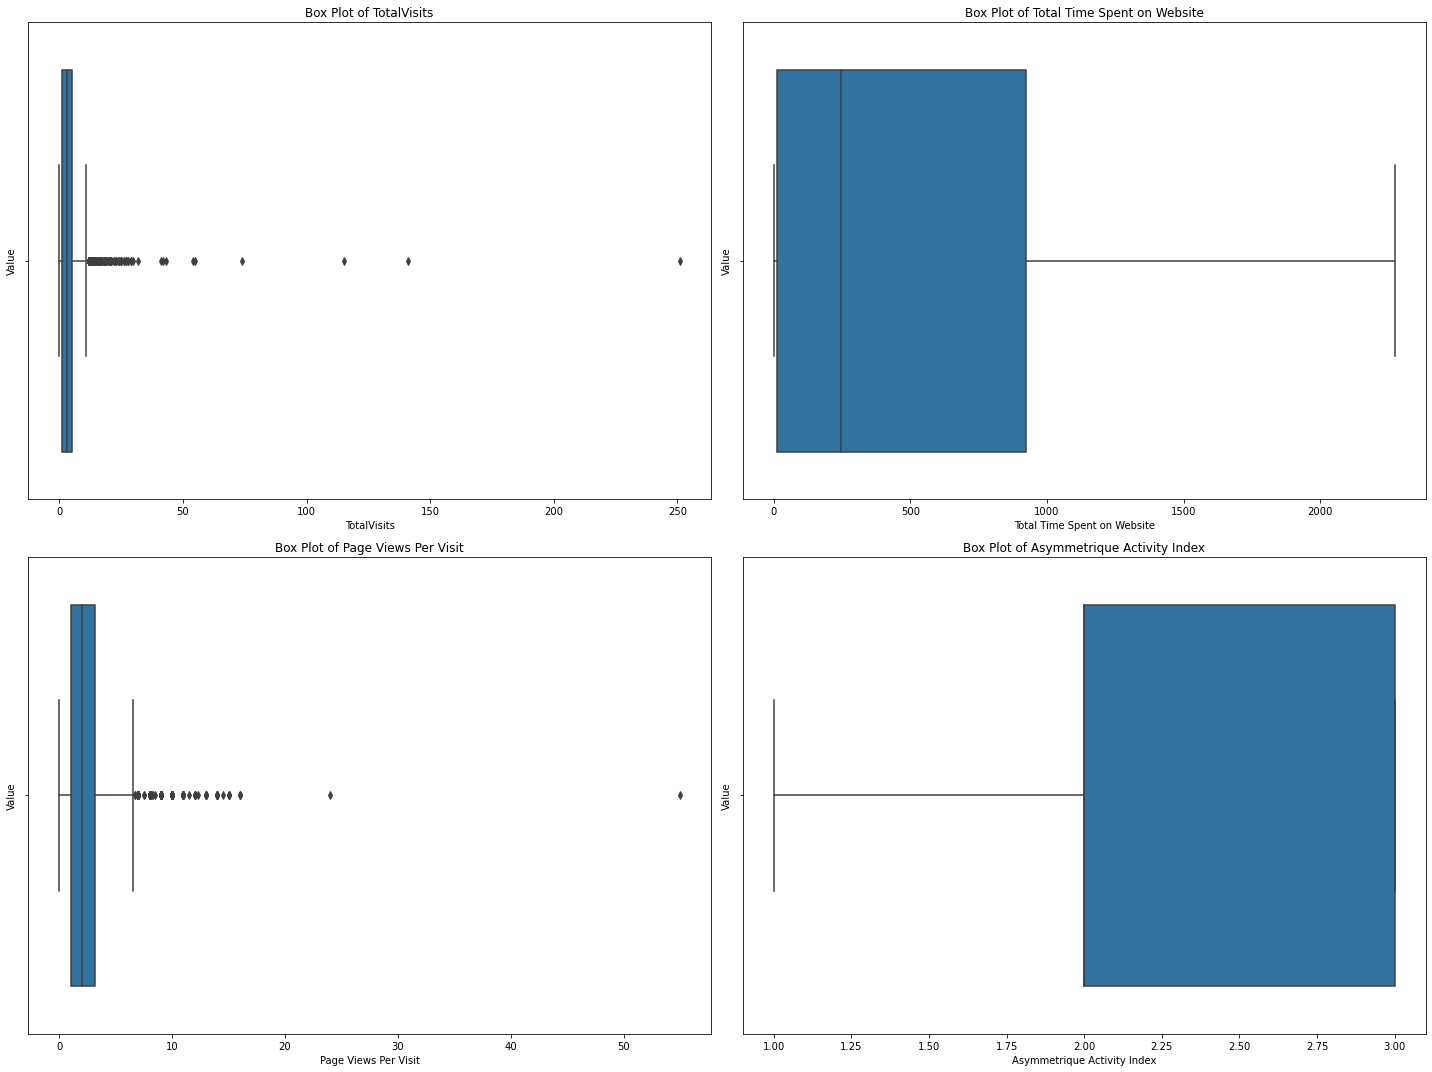

In [37]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Box plot for TotalVisits
sns.boxplot(x='TotalVisits', data=leads_data, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of TotalVisits')
axes[0, 0].set_xlabel('TotalVisits')
axes[0, 0].set_ylabel('Value')

# Box plot for Total Time Spent on Website
sns.boxplot(x='Total Time Spent on Website', data=leads_data, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Total Time Spent on Website')
axes[0, 1].set_xlabel('Total Time Spent on Website')
axes[0, 1].set_ylabel('Value')

# Box plot for Page Views Per Visit
sns.boxplot(x='Page Views Per Visit', data=leads_data, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Page Views Per Visit')
axes[1, 0].set_xlabel('Page Views Per Visit')
axes[1, 0].set_ylabel('Value')

# Box plot for Asymmetrique Activity Index
sns.boxplot(x='Asymmetrique Activity Index', data=leads_data, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Asymmetrique Activity Index')
axes[1, 1].set_xlabel('Asymmetrique Activity Index')
axes[1, 1].set_ylabel('Value')


plt.tight_layout()
plt.show()

In [38]:
percentiles = leads_data['TotalVisits'].quantile([0.05, 0.95]).values
leads_data['TotalVisits'] = np.clip(leads_data['TotalVisits'], percentiles[0], percentiles[1])

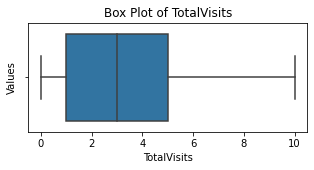

In [39]:

plt.figure(figsize=(5, 2))
sns.boxplot(x='TotalVisits',data=leads_data)
plt.title('Box Plot of TotalVisits')
plt.xlabel('TotalVisits')
plt.ylabel('Values')
plt.show()

In [40]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05, 0.95]).values
leads_data['Page Views Per Visit'] = np.clip(leads_data['Page Views Per Visit'], percentiles[0], percentiles[1])

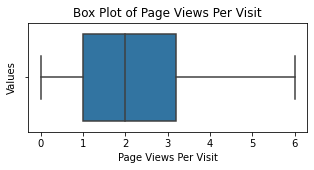

In [41]:
plt.figure(figsize=(5, 2))
sns.boxplot(x='Page Views Per Visit',data=leads_data)
plt.title('Box Plot of Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.ylabel('Values')
plt.show()

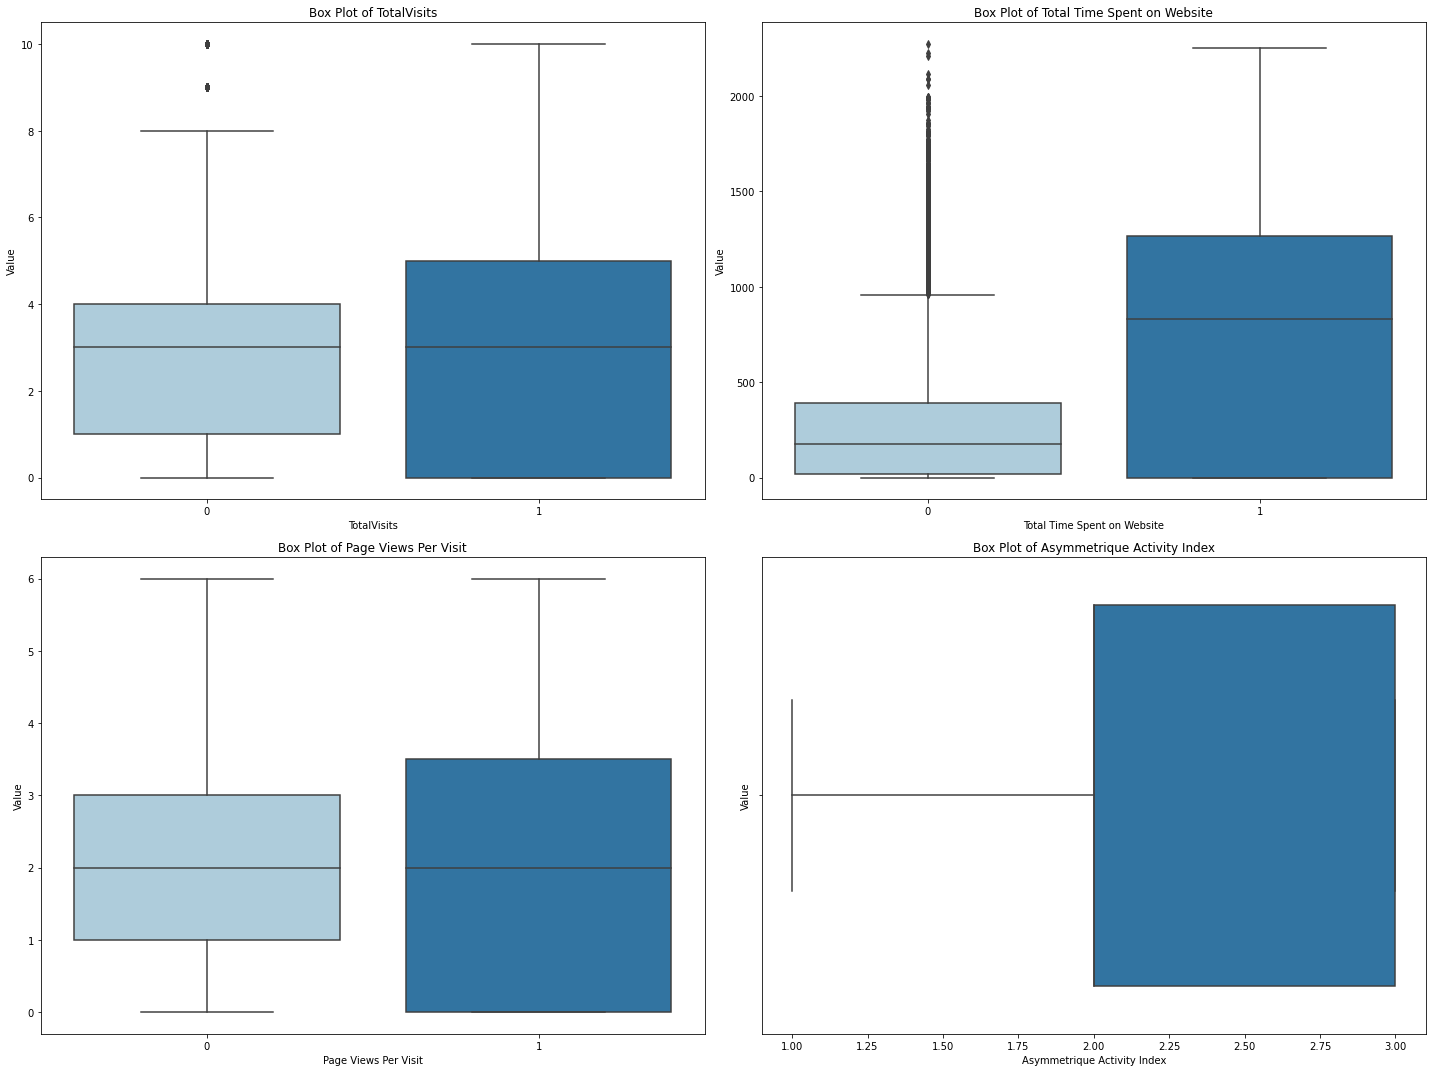

In [42]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Box plot for TotalVisits
sns.boxplot(y='TotalVisits',x = 'Converted', data=leads_data,palette='Paired', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of TotalVisits')
axes[0, 0].set_xlabel('TotalVisits')
axes[0, 0].set_ylabel('Value')

# Box plot for Total Time Spent on Website
sns.boxplot(y='Total Time Spent on Website',x = 'Converted', data=leads_data,palette='Paired', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Total Time Spent on Website')
axes[0, 1].set_xlabel('Total Time Spent on Website')
axes[0, 1].set_ylabel('Value')

# Box plot for Page Views Per Visit
sns.boxplot(y='Page Views Per Visit',x = 'Converted', data=leads_data,palette='Paired', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Page Views Per Visit')
axes[1, 0].set_xlabel('Page Views Per Visit')
axes[1, 0].set_ylabel('Value')

# Box plot for Asymmetrique Activity Index
sns.boxplot(x='Asymmetrique Activity Index', data=leads_data, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Asymmetrique Activity Index')
axes[1, 1].set_xlabel('Asymmetrique Activity Index')
axes[1, 1].set_ylabel('Value')


plt.tight_layout()
plt.show()

In [43]:
irrelavant_columns=['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview']
leads_data.drop(columns=irrelavant_columns, axis=1, inplace=True)

In [44]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [45]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Online Search,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Online Search,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Online Search,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified


In [46]:
leads_data.shape

(9074, 19)

## Data Preparation for Model Building

In [47]:
# Dropping 'Prospect ID' because that column is irrelevant
leads_data.drop(columns="Prospect ID", axis=1, inplace=True)

In [48]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Online Search,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Online Search,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Online Search,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified


### Creating dummy variables for categorical variables

In [49]:
# Getting list of columns with categorical variables
cat_cols= leads_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality',
       'Lead Profile', 'City', 'Last Notable Activity'],
      dtype='object')

In [50]:
# Value counts for 'Lead Origin'
leads_data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [51]:
# Creating dummy for 'Lead Origin'
d = pd.get_dummies(leads_data['Lead Origin'], prefix='Lead Origin', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Lead Origin", axis=1, inplace=True)
leads_data.head()

,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Online Search,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0
1,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Online Search,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0
2,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Online Search,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0
3,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0
4,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified,1,0,0


In [52]:
# Value counts for 'Lead Source'
leads_data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

In [53]:
# Creating dummy for 'Lead Source'
d = pd.get_dummies(leads_data['Lead Source'], prefix='Lead Source', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Lead Source", axis=1, inplace=True)
leads_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Online Search,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0
1,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Online Search,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0
2,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Online Search,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0
3,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0
4,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0


In [54]:
# Value counts for 'Do Not Email'
leads_data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [55]:
# Creating dummy variables for 'Do Not Email'
d = pd.get_dummies(leads_data['Do Not Email'], prefix='Do Not Email', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Do Not Email", axis=1, inplace=True)
leads_data.head()

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes
0,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Online Search,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0
1,No,0,5.0,674,2.5,Email Opened,Finance Management,Online Search,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0
2,No,1,2.0,1532,2.0,Email Opened,Business Administration,Online Search,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0
3,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0
4,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0


In [56]:
leads_data['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [57]:
# Creating dummy variables for 'Do Not call'
d = pd.get_dummies(leads_data['Do Not Call'], prefix='Do Not Call', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Do Not Call", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes
0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Online Search,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Email Opened,Finance Management,Online Search,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,Business Administration,Online Search,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0


In [58]:
leads_data['Specialization'].value_counts()

Finance Management                   4241
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [59]:
# Creating dummy variables for 'Specialization'
d = pd.get_dummies(leads_data['Specialization'], prefix='Specialization', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Specialization", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,Page Visited on Website,Online Search,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Email Opened,Online Search,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,Online Search,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Unreachable,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
leads_data['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Activity                 42
Name: Last Activity, dtype: int64

In [61]:
# Creating dummy variables for 'Last Activity'
d = pd.get_dummies(leads_data['Last Activity'], prefix='Last Activity', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Last Activity", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0.0,0,0.0,Online Search,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,Online Search,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Online Search,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,Other,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
leads_data['How did you hear about X Education'].value_counts()

Online Search            7894
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [63]:
# Creating dummy variables for 'How did you hear about X Education'
d = pd.get_dummies(leads_data['How did you hear about X Education'], prefix='How did you hear about X Education', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="How did you hear about X Education", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
0,0,0.0,0,0.0,Unemployed,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,Unemployed,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,2.0,1428,1.0,Unemployed,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
leads_data['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [65]:
# Creating dummy variables for 'What is your current occupation'
d = pd.get_dummies(leads_data['What is your current occupation'], prefix='What is your current occupation', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="What is your current occupation", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,Better Career Prospects,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,Better Career Prospects,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,2.0,1428,1.0,Better Career Prospects,Might be,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [66]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [67]:
# Creating dummy variables for 'What matters most to you in choosing a course'
d = pd.get_dummies(leads_data['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="What matters most to you in choosing a course", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0.0,0,0.0,Low in Relevance,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,Might be,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,Might be,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,Not Sure,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,Might be,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [68]:
leads_data['Lead Quality'].value_counts()

Might be             6239
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [69]:
# Creating dummy variables for 'Lead Quality'
d = pd.get_dummies(leads_data['Lead Quality'], prefix='Lead Quality', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Lead Quality", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0.0,0,0.0,Potential Lead,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,Potential Lead,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,Potential Lead,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,Potential Lead,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,Potential Lead,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [70]:
leads_data['Lead Profile'].value_counts()

Potential Lead                 8311
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [71]:
# Creating dummy variables for 'Lead Profile'
d = pd.get_dummies(leads_data['Lead Profile'], prefix='Lead Profile', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Lead Profile", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,0,0.0,0,0.0,Mumbai,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,5.0,674,2.5,Mumbai,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,1,2.0,1532,2.0,Mumbai,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1.0,305,1.0,Mumbai,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,1,2.0,1428,1.0,Mumbai,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [72]:
leads_data['City'].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [73]:
# Creating dummy variables for 'City'
d = pd.get_dummies(leads_data['City'], prefix='City', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="City", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,2,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,2,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,2,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,2,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,2,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [74]:
leads_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [75]:
# Creating dummy variables for 'Last Notable Activity'
d = pd.get_dummies(leads_data['Last Notable Activity'], prefix='Last Notable Activity', drop_first = True)
leads_data = pd.concat([leads_data,d], axis=1)
leads_data.drop(columns="Last Notable Activity", axis=1, inplace=True)
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 88 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9074 non-null   int64  
 1   TotalVisits                                                              9074 non-null   float64
 2   Total Time Spent on Website                                              9074 non-null   int64  
 3   Page Views Per Visit                                                     9074 non-null   float64
 4   Asymmetrique Activity Index                                              9074 non-null   int64  
 5   Lead Origin_Landing Page Submission                                      9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                                               

### Scaling for parameters with numerical data

In [77]:
# Standard Scaling the numerical data 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Index'
scaler = StandardScaler()

leads_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Index']] = scaler.fit_transform(leads_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Index']])

leads_data.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,-1.147962,-0.885664,-1.265259,-0.626751,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.650299,0.350519,0.130693,-0.626751,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,-0.428657,1.924177,-0.148498,-0.626751,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,-0.788309,-0.326263,-0.706878,-0.626751,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,-0.428657,1.733431,-0.706878,-0.626751,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [78]:
# Removing spaces in column name
leads_data.columns = leads_data.columns.str.replace(' ', '_').str.lower()
leads_data.columns

Index(['converted', 'totalvisits', 'total_time_spent_on_website',
       'page_views_per_visit', 'asymmetrique_activity_index',
       'lead_origin_landing_page_submission', 'lead_origin_lead_add_form',
       'lead_origin_lead_import', 'lead_source_facebook', 'lead_source_google',
       'lead_source_olark_chat', 'lead_source_organic_search',
       'lead_source_others', 'lead_source_reference',
       'lead_source_referral_sites', 'lead_source_welingak_website',
       'do_not_email_yes', 'do_not_call_yes',
       'specialization_business_administration', 'specialization_e-business',
       'specialization_e-commerce', 'specialization_finance_management',
       'specialization_healthcare_management',
       'specialization_hospitality_management',
       'specialization_human_resource_management',
       'specialization_it_projects_management',
       'specialization_international_business',
       'specialization_marketing_management',
       'specialization_media_and_advertising',

### Independent and Dependent Variables for the Model

In [79]:
# Defining independent and dependent variable for the model
from sklearn.model_selection import train_test_split

y = leads_data['converted']

X=leads_data.drop('converted', axis=1)

### Splitting data into training and testing dataset 

In [80]:
# Splitting data into training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 87 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   totalvisits                                                              6351 non-null   float64
 1   total_time_spent_on_website                                              6351 non-null   float64
 2   page_views_per_visit                                                     6351 non-null   float64
 3   asymmetrique_activity_index                                              6351 non-null   float64
 4   lead_origin_landing_page_submission                                      6351 non-null   uint8  
 5   lead_origin_lead_add_form                                                6351 non-null   uint8  
 6   lead_origin_lead_import                                              

### RFE for feature extraction

In [82]:
# RFE to get best 16 variables fromthe list of 98 variables

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)


from sklearn.feature_selection import RFE
rfe = RFE(logreg,  n_features_to_select=16)             # running RFE with 16 variables as output
rfe_1 = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False])

In [84]:
#list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['total_time_spent_on_website', 'lead_origin_lead_add_form',
       'lead_origin_lead_import', 'lead_source_olark_chat',
       'lead_source_welingak_website', 'do_not_email_yes',
       'last_activity_olark_chat_conversation', 'last_activity_other_activity',
       'how_did_you_hear_about_x_education_sms',
       'what_is_your_current_occupation_working_professional',
       'lead_quality_might_be', 'lead_quality_not_sure', 'lead_quality_worst',
       'last_notable_activity_had_a_phone_conversation',
       'last_notable_activity_sms_sent', 'last_notable_activity_unreachable'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['totalvisits', 'page_views_per_visit', 'asymmetrique_activity_index',
       'lead_origin_landing_page_submission', 'lead_source_facebook',
       'lead_source_google', 'lead_source_organic_search',
       'lead_source_others', 'lead_source_reference',
       'lead_source_referral_sites', 'do_not_call_yes',
       'specialization_business_administration', 'specialization_e-business',
       'specialization_e-commerce', 'specialization_finance_management',
       'specialization_healthcare_management',
       'specialization_hospitality_management',
       'specialization_human_resource_management',
       'specialization_it_projects_management',
       'specialization_international_business',
       'specialization_marketing_management',
       'specialization_media_and_advertising',
       'specialization_operations_management',
       'specialization_retail_management',
       'specialization_rural_and_agribusiness',
       'specialization_services_excellence',
       'special

## Building Model

In [86]:

X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [87]:
# Building Model for iteration #1

logm1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2286.9
Date:                Tue, 23 Jul 2024   Deviance:                       4573.8
Time:                        18:55:21   Pearson chi2:                 7.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0083      0.127      7.929      0.000       0.759       1.257
total_time_spent_on_website                              1.1100      0.044     25.475      0.000       1.025       1.195
lead_origin_lead_add_form                                3.0887      0.240     12.847      0.000       2.617       3.560
lead_origin_lead_import                                  1.3235      0.517      2.562      0.010       0.311       2.336
lead_source_olark_chat                                   1.3312      0.113     11.758      0.000       1.109       1.553
lead_source_welingak_website                             3.0272      0.762      3.974      0.000       1.534       4.520
do_not_email_yes                                        -1.4985      0.184     -8.161      0.000      -1.858      -1.139
last_activity_olark_chat_conversation                   -1.2782      0.171     -7.496      0.000      -1.612      -0.944
last_activity_other_activity                             1.1486      0.605      1.898      0.058      -0.037       2.335
how_did_you_hear_about_x_education_sms                  -1.5113      0.798     -1.893      0.058      -3.076       0.053
what_is_your_current_occupation_working_professional     2.4720      0.203     12.151      0.000       2.073       2.871
lead_quality_might_be                                   -2.6907      0.134    -20.075      0.000      -2.953      -2.428
lead_quality_not_sure                                   -3.4361      0.170    -20.177      0.000      -3.770      -3.102
lead_quality_worst                                      -5.2676      0.394    -13.369      0.000      -6.040      -4.495
last_notable_activity_had_a_phone_conversation           2.0745      1.277      1.625      0.104      -0.428       4.577
last_notable_activity_sms_sent                           1.9100      0.087     21.912      0.000       1.739       2.081
last_notable_activity_unreachable                        1.7962      0.515      3.486      0.000       0.786       2.806
========================================================================================================================
"""

In [88]:
# Accuracy and confustion matrix for iteration #1
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()
# Get Confusion matrix
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
# Checking the overall model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))

Confusion Matrix:
True Negative: 3511      False Positive: 394
False Negative: 608      True Positive: 1838 

Overall model accuracy: 0.8422295701464336


In [89]:
# VIF for iteration #1
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,lead_quality_might_be,1.75
3,lead_source_olark_chat,1.72
1,lead_origin_lead_add_form,1.56
7,last_activity_other_activity,1.55
13,last_notable_activity_had_a_phone_conversation,1.55
14,last_notable_activity_sms_sent,1.50
6,last_activity_olark_chat_conversation,1.41
4,lead_source_welingak_website,1.34
0,total_time_spent_on_website,1.29
9,what_is_your_current_occupation_working_profes...,1.18


In [90]:
# dropping 'lead_profile_lateral_student' for high p-value
X_train_rfe=X_train_rfe.drop(['last_notable_activity_had_a_phone_conversation'],axis=1)
X_train_rfe.head(1)

,const,total_time_spent_on_website,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_olark_chat_conversation,last_activity_other_activity,how_did_you_hear_about_x_education_sms,what_is_your_current_occupation_working_professional,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,last_notable_activity_sms_sent,last_notable_activity_unreachable
3009,1.0,-0.157526,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [91]:
# Building Model for iteration #2

logm2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2288.5
Date:                Tue, 23 Jul 2024   Deviance:                       4577.0
Time:                        18:55:21   Pearson chi2:                 7.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0106      0.127      7.950      0.000       0.761       1.260
total_time_spent_on_website                              1.1093      0.044     25.467      0.000       1.024       1.195
lead_origin_lead_add_form                                3.0789      0.240     12.828      0.000       2.609       3.549
lead_origin_lead_import                                  1.3210      0.517      2.557      0.011       0.308       2.334
lead_source_olark_chat                                   1.3260      0.113     11.717      0.000       1.104       1.548
lead_source_welingak_website                             3.0355      0.762      3.986      0.000       1.543       4.528
do_not_email_yes                                        -1.5046      0.184     -8.185      0.000      -1.865      -1.144
last_activity_olark_chat_conversation                   -1.2765      0.171     -7.486      0.000      -1.611      -0.942
last_activity_other_activity                             1.7724      0.500      3.547      0.000       0.793       2.752
how_did_you_hear_about_x_education_sms                  -1.5124      0.798     -1.895      0.058      -3.077       0.052
what_is_your_current_occupation_working_professional     2.4689      0.203     12.138      0.000       2.070       2.868
lead_quality_might_be                                   -2.6910      0.134    -20.082      0.000      -2.954      -2.428
lead_quality_not_sure                                   -3.4403      0.170    -20.207      0.000      -3.774      -3.107
lead_quality_worst                                      -5.2681      0.394    -13.371      0.000      -6.040      -4.496
last_notable_activity_sms_sent                           1.9105      0.087     21.919      0.000       1.740       2.081
last_notable_activity_unreachable                        1.7956      0.515      3.485      0.000       0.786       2.805
========================================================================================================================
"""

In [92]:
# Accuracy and confustion matrix for iteration #2
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()
# Get Confusion matrix
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
# Checking the overall model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))

Confusion Matrix:
True Negative: 3511      False Positive: 394
False Negative: 606      True Positive: 1840 

Overall model accuracy: 0.8425444811840656


In [93]:
# VIF for iteration #2
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,lead_quality_might_be,1.75
3,lead_source_olark_chat,1.72
1,lead_origin_lead_add_form,1.56
7,last_activity_other_activity,1.55
13,last_notable_activity_had_a_phone_conversation,1.55
14,last_notable_activity_sms_sent,1.50
6,last_activity_olark_chat_conversation,1.41
4,lead_source_welingak_website,1.34
0,total_time_spent_on_website,1.29
9,what_is_your_current_occupation_working_profes...,1.18


In [94]:
# dropping 'how_did_you_hear_about_x_education_sms' for high p-value
X_train_rfe=X_train_rfe.drop(['how_did_you_hear_about_x_education_sms'],axis=1)
X_train_rfe.head(1)

,const,total_time_spent_on_website,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_olark_chat_conversation,last_activity_other_activity,what_is_your_current_occupation_working_professional,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,last_notable_activity_sms_sent,last_notable_activity_unreachable
3009,1.0,-0.157526,0,0,0,0,0,0,0,0,1,0,0,0,0


In [95]:
# Building Model for iteration #3

logm3 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2290.7
Date:                Tue, 23 Jul 2024   Deviance:                       4581.5
Time:                        18:55:21   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0082      0.127      7.932      0.000       0.759       1.257
total_time_spent_on_website                              1.1078      0.044     25.465      0.000       1.023       1.193
lead_origin_lead_add_form                                3.0824      0.240     12.843      0.000       2.612       3.553
lead_origin_lead_import                                  1.3250      0.517      2.564      0.010       0.312       2.338
lead_source_olark_chat                                   1.3303      0.113     11.756      0.000       1.109       1.552
lead_source_welingak_website                             3.0359      0.762      3.986      0.000       1.543       4.529
do_not_email_yes                                        -1.4999      0.184     -8.161      0.000      -1.860      -1.140
last_activity_olark_chat_conversation                   -1.2742      0.171     -7.473      0.000      -1.608      -0.940
last_activity_other_activity                             1.7764      0.500      3.555      0.000       0.797       2.756
what_is_your_current_occupation_working_professional     2.4736      0.203     12.165      0.000       2.075       2.872
lead_quality_might_be                                   -2.6948      0.134    -20.109      0.000      -2.957      -2.432
lead_quality_not_sure                                   -3.4413      0.170    -20.209      0.000      -3.775      -3.108
lead_quality_worst                                      -5.2661      0.394    -13.367      0.000      -6.038      -4.494
last_notable_activity_sms_sent                           1.9093      0.087     21.924      0.000       1.739       2.080
last_notable_activity_unreachable                        1.7774      0.519      3.422      0.001       0.759       2.796
========================================================================================================================
"""

In [96]:
# Accuracy and confusion matrix for iteration #3
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()
# Get Confusion matrix
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
# Checking the overall model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))

Confusion Matrix:
True Negative: 3513      False Positive: 392
False Negative: 607      True Positive: 1839 

Overall model accuracy: 0.8427019367028814


In [97]:
# VIF for iteration #3
X_train_new = X_train_rfe
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,lead_quality_might_be,1.75
3,lead_source_olark_chat,1.72
1,lead_origin_lead_add_form,1.56
7,last_activity_other_activity,1.55
13,last_notable_activity_had_a_phone_conversation,1.55
14,last_notable_activity_sms_sent,1.50
6,last_activity_olark_chat_conversation,1.41
4,lead_source_welingak_website,1.34
0,total_time_spent_on_website,1.29
9,what_is_your_current_occupation_working_profes...,1.18


## Final Model

In [98]:
# Building final Model

logm = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2290.7
Date:                Tue, 23 Jul 2024   Deviance:                       4581.5
Time:                        18:55:21   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0082      0.127      7.932      0.000       0.759       1.257
total_time_spent_on_website                              1.1078      0.044     25.465      0.000       1.023       1.193
lead_origin_lead_add_form                                3.0824      0.240     12.843      0.000       2.612       3.553
lead_origin_lead_import                                  1.3250      0.517      2.564      0.010       0.312       2.338
lead_source_olark_chat                                   1.3303      0.113     11.756      0.000       1.109       1.552
lead_source_welingak_website                             3.0359      0.762      3.986      0.000       1.543       4.529
do_not_email_yes                                        -1.4999      0.184     -8.161      0.000      -1.860      -1.140
last_activity_olark_chat_conversation                   -1.2742      0.171     -7.473      0.000      -1.608      -0.940
last_activity_other_activity                             1.7764      0.500      3.555      0.000       0.797       2.756
what_is_your_current_occupation_working_professional     2.4736      0.203     12.165      0.000       2.075       2.872
lead_quality_might_be                                   -2.6948      0.134    -20.109      0.000      -2.957      -2.432
lead_quality_not_sure                                   -3.4413      0.170    -20.209      0.000      -3.775      -3.108
lead_quality_worst                                      -5.2661      0.394    -13.367      0.000      -6.038      -4.494
last_notable_activity_sms_sent                           1.9093      0.087     21.924      0.000       1.739       2.080
last_notable_activity_unreachable                        1.7774      0.519      3.422      0.001       0.759       2.796
========================================================================================================================
"""

In [99]:
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(20)

,Converted,Converted_Prob,predicted
0,0,0.134575,0
1,0,0.212829,0
2,0,0.110664,0
3,1,0.885500,1
4,1,0.451203,0
5,1,0.775731,1
6,0,0.065398,0
7,1,0.830273,1
8,1,0.982810,1
9,0,0.592416,1


In [100]:
# Accuracy and Confusion matrix for final model
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
# Checking the overall model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))

Confusion Matrix:
True Negative: 3513      False Positive: 392
False Negative: 607      True Positive: 1839 

Overall model accuracy: 0.8427019367028814


In [101]:
# Accuracy, Sensitivity, Specificity, False Positive Rate 
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.predicted))
print('Sensitivity / Recall: ',tp / float(tp+fn))
print('Specificity: ', tn / float(tn+fp))
print('False Positive Rate: ',fp/ float(tn+fp))

Overall model accuracy: 0.8427019367028814
Sensitivity / Recall:  0.7518397383483238
Specificity:  0.8996158770806658
False Positive Rate:  0.10038412291933418


## Building ROC curve

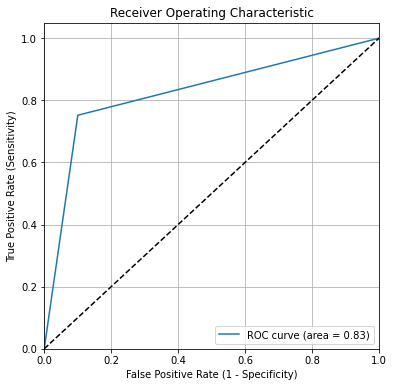

In [102]:
# Plotting ROC curve

fpr, tpr, thresholds= roc_curve(y_train_pred_final.Converted, y_train_pred_final.predicted, drop_intermediate = False )
auc_score= roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Finding optimal Cut-off

In [103]:
# Finding optimal cut-off 

num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]=  y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.134575,0,1,1,0,0,0,0,0,0,0,0
1,0,0.212829,0,1,1,1,0,0,0,0,0,0,0
2,0,0.110664,0,1,1,0,0,0,0,0,0,0,0
3,1,0.885500,1,1,1,1,1,1,1,1,1,1,0
4,1,0.451203,0,1,1,1,1,1,0,0,0,0,0


In [104]:
df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for i in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final[i]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    df.loc[i]= [i,accuracy,sensitivity,specificity]
    
df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.689340,0.960343,0.519590
0.2,0.2,0.777043,0.927228,0.682971
0.3,0.3,0.828059,0.860180,0.807939
0.4,0.4,0.840498,0.811938,0.858387
0.5,0.5,0.842702,0.751840,0.899616
0.6,0.6,0.843017,0.699509,0.932907
0.7,0.7,0.821288,0.599755,0.960051
0.8,0.8,0.801921,0.526574,0.974392
0.9,0.9,0.760668,0.399836,0.986684


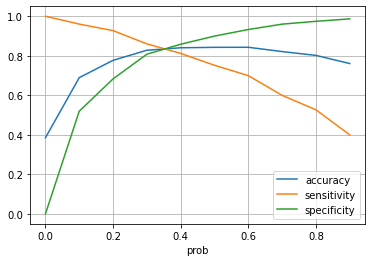

In [105]:

df.plot.line(x= 'prob', y= ['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

In above plot, it’s visible that 0.35 is the optimal point to set as cutoff probability for our model.

In [106]:
# Creating pred_final column and generating prediction based on probability cutoff 0.35

y_train_pred_final['pred_final']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

## Model Evaluation on Train Dataset

In [107]:
# Model evaluation on Train Dataset

print('Model Evaluation Metrics on Train dataset')


TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.pred_final).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


print('Overall model accuracy:', accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.pred_final))

print('Sensitivity / Recall: ',TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('False Positive Rate: ',FP/ float(TN+FP))



Model Evaluation Metrics on Train dataset
Confusion Matrix:
True Negative: 3230      False Positive: 675
False Negative: 385      True Positive: 2061 

Overall model accuracy: 0.8330971500551094
Sensitivity / Recall:  0.8426001635322976
Specificity:  0.8271446862996159
False Positive Rate:  0.17285531370038412


In [108]:
leads_data2=pd.read_csv("Leads.csv",sep=",",encoding='utf-8')
leads_data2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [109]:
# Adding lead Number in the final results dataframe
y_train_pred_final= y_train_pred_final.merge(leads_data2['Lead Number'], how= 'left', left_index= True, right_index= True)

# Generating Lead Score on Train dataset
y_train_pred_final['Lead Score']= y_train_pred_final.Converted_Prob * 100
y_train_pred_final= y_train_pred_final[['Lead Number', 'Converted', 'predicted', 'Converted_Prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_train_pred_final.head(10)

,Lead Number,Converted,predicted,Converted_Prob,Lead Score
5706,606187,1,1,0.999683,99.968252
5190,610126,1,1,0.999616,99.961596
4776,614095,1,1,0.999613,99.961326
5871,604900,1,1,0.999557,99.955678
4495,616581,1,1,0.999443,99.944305
4242,619225,1,1,0.999441,99.944112
1577,643838,1,1,0.999423,99.942343
3713,624527,1,1,0.999416,99.941593
1543,644036,1,1,0.999376,99.937635
2254,637880,1,1,0.998911,99.891123


## Model Evaluation on Test dataset

In [110]:
X_test.head(1)

,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_activity_index,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_it_projects_management,specialization_international_business,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,last_activity_email_bounced,last_activity_email_link_clicked,last_activity_email_opened,last_activity_form_submitted_on_website,last_activity_olark_chat_conversation,last_activity_other_activity,last_activity_page_visited_on_website,last_activity_sms_sent,last_activity_unreachable,last_activity_unsubscribed,how_did_you_hear_about_x_education_email,how_did_you_hear_about_x_education_multiple_sources,how_did_you_hear_about_x_education_online_search,how_did_you_hear_about_x_education_other,how_did_you_hear_about_x_education_sms,how_did_you_hear_about_x_education_social_media,how_did_you_hear_about_x_education_student_of_someschool,how_did_you_hear_about_x_education_word_of_mouth,what_is_your_current_occupation_housewife,what_is_your_current_occupation_other,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working_professional,what_matters_most_to_you_in_choosing_a_course_flexibility_&_convenience,what_matters_most_to_you_in_choosing_a_course_other,lead_quality_low_in_relevance,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,lead_profile_lateral_student,lead_profile_other_leads,lead_profile_potential_lead,lead_profile_student_of_someschool,city_other_cities,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
3271,0.290647,-0.59771,0.968264,0.912393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [111]:
test_cols= list(X_train_rfe.columns)
test_cols.remove('const')
X_test= X_test[test_cols]
X_test.head()

,total_time_spent_on_website,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_olark_chat_conversation,last_activity_other_activity,what_is_your_current_occupation_working_professional,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,last_notable_activity_sms_sent,last_notable_activity_unreachable
3271,-0.597710,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,1.889329,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,-0.749941,0,0,0,0,0,0,0,0,1,0,0,0,0
4216,-0.885664,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,-0.584872,0,0,0,0,0,0,0,0,1,0,0,0,0


In [112]:
X_test_final= sm.add_constant(X_test)
X_test_final.head()

,const,total_time_spent_on_website,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_olark_chat,lead_source_welingak_website,do_not_email_yes,last_activity_olark_chat_conversation,last_activity_other_activity,what_is_your_current_occupation_working_professional,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,last_notable_activity_sms_sent,last_notable_activity_unreachable
3271,1.0,-0.597710,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,1.0,1.889329,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,1.0,-0.749941,0,0,0,0,0,0,0,0,1,0,0,0,0
4216,1.0,-0.885664,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,1.0,-0.584872,0,0,0,0,0,0,0,0,1,0,0,0,0


In [113]:
y_test_pred = res.predict(X_test_final).values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head(20)


,Converted,Converted_Prob,predicted
0,0,0.087165,0
1,1,0.996222,1
2,0,0.074648,0
3,1,0.957283,1
4,0,0.088304,0
5,1,0.934324,1
6,0,0.223943,0
7,0,0.217207,0
8,1,0.993431,1
9,0,0.207932,0


In [114]:
# Adding lead Number in the final results dataframe for test set
y_test_pred_final= y_test_pred_final.merge(leads_data2['Lead Number'], how= 'left', left_index= True, right_index= True)
y_test_pred_final['Lead Score']= y_test_pred_final.Converted_Prob * 100
y_test_pred_final= y_test_pred_final[['Lead Number', 'Converted', 'predicted', 'Converted_Prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_test_pred_final.head(10)

,Lead Number,Converted,predicted,Converted_Prob,Lead Score
505,655122,1,1,0.998937,99.893675
1582,643814,1,1,0.998931,99.893051
2565,634875,1,1,0.998778,99.877784
868,651281,1,1,0.998656,99.865554
1525,644144,1,1,0.998072,99.807226
2055,639824,1,1,0.998049,99.804866
140,659123,1,1,0.997861,99.786131
655,653773,1,1,0.997861,99.786131
573,654319,1,1,0.997861,99.786131
1963,640614,1,1,0.997802,99.780198


In [115]:
# Model Evaluation on Test dataset

print('Model Evaluation Metrics on Test dataset')


TN,FP,FN,TP= confusion_matrix(y_true= y_test_pred_final.Converted, y_pred= y_test_pred_final.predicted).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


print('Overall model accuracy:', accuracy_score(y_true= y_test_pred_final.Converted, y_pred= y_test_pred_final.predicted))

print('Sensitivity / Recall: ',TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('False Positive Rate: ',FP/ float(TN+FP))

Model Evaluation Metrics on Test dataset
Confusion Matrix:
True Negative: 1566      False Positive: 168
False Negative: 266      True Positive: 723 

Overall model accuracy: 0.8406169665809768
Sensitivity / Recall:  0.731041456016178
Specificity:  0.903114186851211
False Positive Rate:  0.09688581314878893
